<a href="https://colab.research.google.com/github/andreamurari/percolation_project/blob/main/percolation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy
from scipy.stats import poisson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import math
from sklearn.cluster import DBSCAN

In [2]:
def generate_poisson_coordinates(T, k):
  # Step 1: Generate N from Poisson distribution
  N = np.random.poisson(k * T**2)
  # Step 2: Check if N is zero and handle termination
  if N == 0:
    return []
  # Step 3: Generate random numbers and scale to coordinates
  else:
    coordinates_x = []
    coordinates_y = []
    for _ in range(N):
      U = np.random.random()
      V = np.random.random()
      coordinates_x.append(U * T)
      coordinates_y.append(V * T)
  print (f"N = {N} \nCoordinates X = {coordinates_x} \nCoordinates Y = {coordinates_y}")
  return coordinates_x, coordinates_y

In [3]:
T = 20
l = 1

In [4]:
coordinates_x, coordinates_y = generate_poisson_coordinates(T, l)

N = 403 
Coordinates X = [15.225628043090031, 13.859200485452849, 9.781783950514225, 1.471012583360245, 6.882574723244681, 18.991303007571187, 16.706205883904623, 2.326098437311055, 4.636210302602903, 11.241437254073974, 12.813176138050402, 0.09270345194939855, 4.214718331314109, 3.015159574449604, 18.77597962213334, 1.7838833090736017, 12.470147802867668, 4.133995327695286, 5.930863757735578, 13.46779718359369, 19.716295236092044, 5.649470867911679, 11.392371938276057, 0.9654170340724111, 7.299175968919078, 10.02598234329383, 1.6286339670815075, 10.172558985610216, 4.10897719688008, 3.2656886438041832, 11.441671727554114, 9.525569818946522, 10.122774683078116, 17.6566909558126, 1.9825262853180181, 7.721439756166539, 0.43326072638778523, 2.9559311506309327, 14.58555104375764, 17.000209247716672, 9.62864698941932, 2.9104563464594224, 4.5261061541746646, 12.096913513009858, 16.756235941132562, 0.2695837481485963, 4.235472629439823, 16.52857197425985, 6.167026016764357, 8.759080706316983,

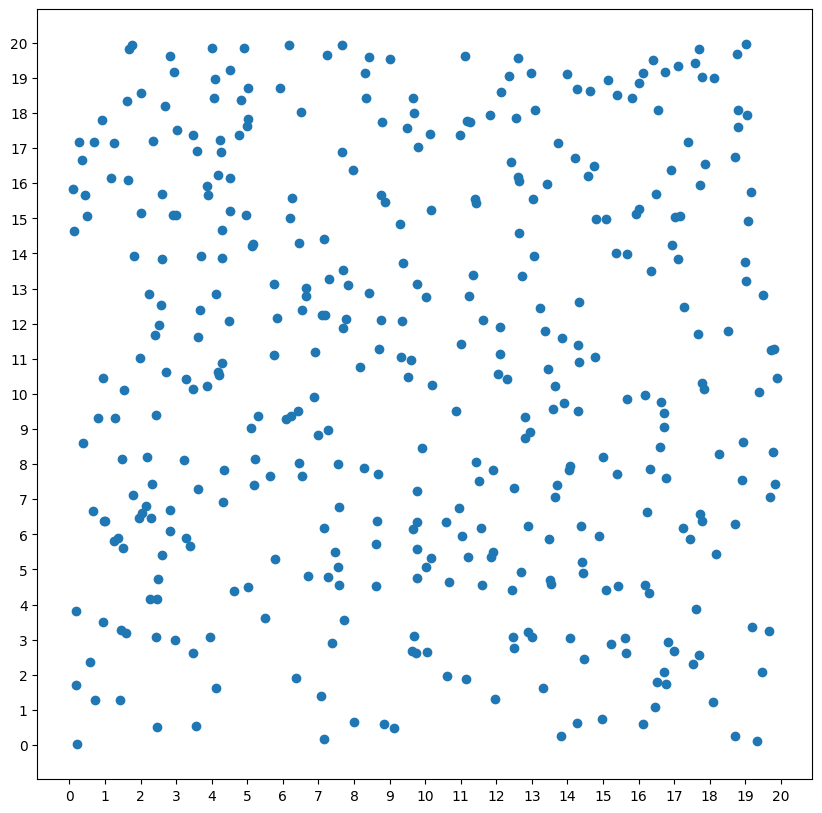

In [5]:
plt.figure(figsize = (10, 10))
plt.scatter (coordinates_x, coordinates_y)
plt.xticks(range(0, T + 1, 1))
plt.yticks(range(0, T + 1, 1))
plt.show()

In [6]:

def clusterizza_dbscan(coordinates_x, coordinates_y, eps=1, min_samples=2):
  """
  Clusters points based on their distance using DBSCAN.

  Args:
    coordinates_x: List of x-coordinates.
    coordinates_y: List of y-coordinates.
    eps (float, optional): The maximum distance between two points to be considered neighbors. Defaults to 1.0.
    min_samples (int, optional): The minimum number of samples (including a point itself) to form a dense region. Defaults to 2.

  Returns:
    A list of clusters, where each cluster is a list of point indices.
  """

  # Combine x and y coordinates into a single NumPy array
  coordinates = np.array(list(zip(coordinates_x, coordinates_y)))

  # Create a DBSCAN instance with specified parameters
  db = DBSCAN(eps=eps, min_samples=min_samples)

  # Fit the model to the data points
  db.fit(coordinates)

  # Extract cluster labels for each point
  cluster_labels = db.labels_

  # Create a list to store clusters (indices of points in each cluster)
  clusters = []
  for i, label in enumerate(cluster_labels):
    # Skip noise points (labeled -1)
    if label == -1:
      continue
    # Find all points with the same label (belonging to the same cluster)
    cluster_indices = [j for j, l in enumerate(cluster_labels) if l == label]
    clusters.append(cluster_indices)

  return clusters


In [13]:
def remove_duplicates(clusters):
  for i in range(len(clusters_with_doubles)):
    for j in range(i+1, len(clusters_with_doubles)):
      if clusters_with_doubles[i] == clusters_with_doubles[j]:
        clusters_with_doubles[j] = "duplicato"
  clusters = []
  for element in clusters_with_doubles:
    if element != "duplicato":
      clusters.append(element)

In [14]:
clusters_with_doubles = clusterizza_dbscan(coordinates_x, coordinates_y)
clusters = remove_duplicates(clusters_with_doubles)